# Twitter Sentiment Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import re
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("twitter_train.csv", index_col = 0)

In [3]:
df.head()

,id,label,tweet,clean_tweet,hashtag,lemma
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,run,father dysfunctional selfish drag kid dysfunct...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cannot use cause the...,lyft disapointed getthanked,thank lyft credit use offer wheelchair van p...
2,3,0,bihday your majesty,bihday your majesty,NaN,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur...,model,model love u u time ur ...
4,5,0,factsguide: society now #motivation,factsguide society now motivation,motivation,factsguide society motivation


In [4]:
# Nan values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31962 entries, 0 to 31961
Data columns (total 6 columns):
id             31962 non-null int64
label          31962 non-null int64
tweet          31962 non-null object
clean_tweet    31960 non-null object
hashtag        23364 non-null object
lemma          31925 non-null object
dtypes: int64(2), object(4)
memory usage: 1.7+ MB


In [5]:
df["hashtag"].fillna("No hashtag", inplace = True)

In [6]:
df["lemma"].fillna(df["clean_tweet"], inplace = True)

In [7]:
df.dropna(inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31960 entries, 0 to 31961
Data columns (total 6 columns):
id             31960 non-null int64
label          31960 non-null int64
tweet          31960 non-null object
clean_tweet    31960 non-null object
hashtag        31960 non-null object
lemma          31960 non-null object
dtypes: int64(2), object(4)
memory usage: 1.7+ MB


In [9]:
df.head()

,id,label,tweet,clean_tweet,hashtag,lemma
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,run,father dysfunctional selfish drag kid dysfunct...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cannot use cause the...,lyft disapointed getthanked,thank lyft credit use offer wheelchair van p...
2,3,0,bihday your majesty,bihday your majesty,No hashtag,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur...,model,model love u u time ur ...
4,5,0,factsguide: society now #motivation,factsguide society now motivation,motivation,factsguide society motivation


## VADER Sentiment Analysis

In [10]:
# Can we predict the labels using VADER Sentiment Analysis?

In [11]:
# Import SentimentIntensityAnalyzer and create an sid object
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

C:\Users\gisel\Anaconda3\envs\nlp_course\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [12]:
df['pred_label'] = df['clean_tweet'].apply(lambda tweet: sid.polarity_scores(tweet))
df['compound']  = df['pred_label'].apply(lambda label_dict: label_dict['compound'])

# 0 if the sentiment is positive, 1 for negative or hatred
df['comp_label'] = df['compound'].apply(lambda c: 0 if c >=0 else 1)

df.head()

,id,label,tweet,clean_tweet,hashtag,lemma,pred_label,compound,comp_label
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,run,father dysfunctional selfish drag kid dysfunct...,"{'neg': 0.402, 'neu': 0.598, 'pos': 0.0, 'comp...",-0.8296,1
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cannot use cause the...,lyft disapointed getthanked,thank lyft credit use offer wheelchair van p...,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.6705,0
2,3,0,bihday your majesty,bihday your majesty,No hashtag,bihday majesty,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur...,model,model love u u time ur ...,"{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp...",0.6369,0
4,5,0,factsguide: society now #motivation,factsguide society now motivation,motivation,factsguide society motivation,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.3400,0


In [13]:
# Perform a comparison analysis between the original `label` and `comp_label`

In [14]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [15]:
accuracy_score(df['label'],df['comp_label'])

0.7836357947434293

In [16]:
print(classification_report(df['label'],df['comp_label']))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87     29718
           1       0.15      0.47      0.23      2242

   micro avg       0.78      0.78      0.78     31960
   macro avg       0.55      0.64      0.55     31960
weighted avg       0.90      0.78      0.83     31960



In [17]:
conf_matrix = confusion_matrix(df['label'],df['comp_label']) 

In [18]:
confus_matrix = pd.DataFrame(conf_matrix, columns = ["Pred 0", "Pred 1"], index = ["True 0", "True 1"])

In [19]:
confus_matrix
# VADER is having a hard time to predict true hatred tweets

,Pred 0,Pred 1
True 0,23999,5719
True 1,1196,1046


In [20]:
# Checking the same VADER analysis using lemmatized tweets

In [21]:
df['lemma_pred_label'] = df['lemma'].apply(lambda tweet: sid.polarity_scores(tweet))
df['lemma_compound']  = df['lemma_pred_label'].apply(lambda label_dict: label_dict['compound'])

# 0 if the sentiment is positive, 1 for negative or hatred
df['lemma_comp_label'] = df['lemma_compound'].apply(lambda c: 0 if c >=0 else 1)

df.head()

,id,label,tweet,clean_tweet,hashtag,lemma,pred_label,compound,comp_label,lemma_pred_label,lemma_compound,lemma_comp_label
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,run,father dysfunctional selfish drag kid dysfunct...,"{'neg': 0.402, 'neu': 0.598, 'pos': 0.0, 'comp...",-0.8296,1,"{'neg': 0.661, 'neu': 0.339, 'pos': 0.0, 'comp...",-0.7783,1
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cannot use cause the...,lyft disapointed getthanked,thank lyft credit use offer wheelchair van p...,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.6705,0,"{'neg': 0.0, 'neu': 0.611, 'pos': 0.389, 'comp...",0.6249,0
2,3,0,bihday your majesty,bihday your majesty,No hashtag,bihday majesty,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur...,model,model love u u time ur ...,"{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp...",0.6369,0,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.6369,0
4,5,0,factsguide: society now #motivation,factsguide society now motivation,motivation,factsguide society motivation,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.3400,0,"{'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'comp...",0.3400,0


In [22]:
accuracy_score(df['label'],df['lemma_comp_label'])

0.7926783479349186

In [23]:
print(classification_report(df['label'],df['lemma_comp_label']))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88     29718
           1       0.16      0.47      0.24      2242

   micro avg       0.79      0.79      0.79     31960
   macro avg       0.56      0.64      0.56     31960
weighted avg       0.90      0.79      0.84     31960



In [24]:
conf_matrix_lemma = confusion_matrix(df['label'],df['lemma_comp_label']) 

In [25]:
confus_matrix_lemma = pd.DataFrame(conf_matrix_lemma, columns = ["Pred 0", "Pred 1"], index = ["True 0", "True 1"])
confus_matrix_lemma
# it improved a little bit precision and recall for True non hatred. but overall didn't improve a lot the results

,Pred 0,Pred 1
True 0,24281,5437
True 1,1189,1053


### TFIDF and model training

In [26]:
# split the data into train and test

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df["lemma"]
y = df["label"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train.shape

(25568,)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
estimators = [('tfidf', TfidfVectorizer()),
              ('model', LogisticRegression())]

In [33]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
              ('model', LogisticRegression())])

In [34]:
pipe.fit(X_train, y_train) 

C:\Users\gisel\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [35]:
predictions = pipe.predict(X_test)

In [36]:
# Print the overall accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test,predictions))

0.9488423028785983


In [37]:
# Report the confusion matrix
confusion_matrix1 = metrics.confusion_matrix(y_test,predictions)

In [38]:
matrix = pd.DataFrame(confusion_matrix1, columns = ["Pred 0", "Pred 1"], index = ["True 0", "True 1"])
matrix

,Pred 0,Pred 1
True 0,5917,20
True 1,307,148


In [39]:
print(metrics.classification_report(y_test,predictions))
# Logistic regression is failing to classify correctly hatred tweets 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.88      0.33      0.48       455

   micro avg       0.95      0.95      0.95      6392
   macro avg       0.92      0.66      0.72      6392
weighted avg       0.95      0.95      0.94      6392



In [40]:
# Evaluate models

In [41]:
my_tfidf = TfidfVectorizer()

In [42]:
X_train = my_tfidf.fit_transform(X_train)
X_test = my_tfidf.transform(X_test)

In [43]:
# non-esemble models
num_folds = 10
seed = 7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('decision_tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', svm.SVC()))

              
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s %f %f " % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    
import warnings
warnings.filterwarnings('ignore')

LR 0.946143 0.004089 
decision_tree 0.950563 0.004561 
KNN 0.940198 0.004796 


C:\Users\gisel\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM 0.930108 0.005040 


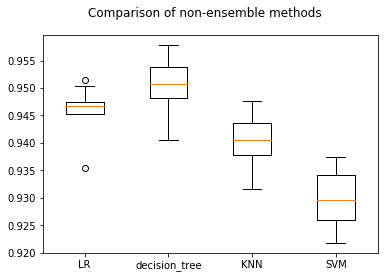

In [44]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Comparison of non-ensemble methods')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

In [45]:
#Tunning the decision tree

In [46]:
max_depth= [1, 3, 5, 7, 9, 15, 19, 21]
param_grid = dict(max_depth=max_depth)
model = DecisionTreeClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print(f'test score is :  {grid_result.score(X_test, y_test)}')


Best: 0.948060 using {'max_depth': 19}
test score is :  0.9466520650813517


In [47]:
best_grid = grid_result.best_estimator_
predictions = best_grid.predict(X_test)

In [48]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5937
           1       0.82      0.32      0.46       455

   micro avg       0.95      0.95      0.95      6392
   macro avg       0.89      0.66      0.72      6392
weighted avg       0.94      0.95      0.94      6392



In [49]:
matrix = pd.DataFrame(confusion_matrix1, columns = ["Pred 0", "Pred 1"], index = ["True 0", "True 1"])
matrix

,Pred 0,Pred 1
True 0,5917,20
True 1,307,148


In [50]:
confusion_matrix1 = metrics.confusion_matrix(y_test,predictions)

In [ ]:
# esembles models

AB: 0.946456 (0.003736)
GBM: 0.946808 (0.004643)
RF: 0.958111 (0.003293)
XG: 0.953927 (0.003608)


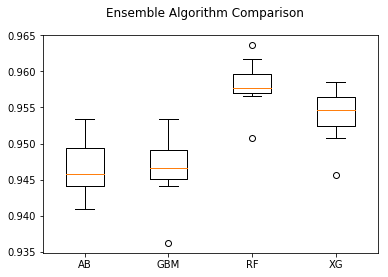

In [51]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('XG', XGBClassifier()))
results = []
names = []

for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

In [69]:
param_grid = {
    'max_depth': [80, 90, 100, 300],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 27.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [80, 90, 100, 300], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [70]:
grid_search.best_params_

{'max_depth': 300, 'n_estimators': 300}

In [71]:
best_grid = grid_search.best_estimator_
print(f'test score is :  {best_grid.score(X_test, y_test)}')

test score is :  0.96229662077597


In [72]:
predictions = best_grid.predict(X_test)

In [75]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5937
           1       0.92      0.51      0.66       455

   micro avg       0.96      0.96      0.96      6392
   macro avg       0.94      0.76      0.82      6392
weighted avg       0.96      0.96      0.96      6392



In [76]:
confusion_matrix1 = metrics.confusion_matrix(y_test,predictions)

In [77]:
matrix = pd.DataFrame(confusion_matrix1, columns = ["Pred 0", "Pred 1"], index = ["True 0", "True 1"])
matrix
# random forest is way better than decision tree classifier to determine hatred tweets
# recall of 0.51 for hatred tweets, still not ideal 

,Pred 0,Pred 1
True 0,5917,20
True 1,221,234
